# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from collections import deque
from unityagents import UnityEnvironment

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
use_tensorboard = True

if use_tensorboard:
    
    import uuid
    from tensorboardX import SummaryWriter
    unique_str = str(uuid.uuid1())
    print("Session {} - look for this name in Tensorboard logs.".format(unique_str))
    tensorboard_writer = SummaryWriter("./tensorboard_logs/{}".format(unique_str))    
else:
    tensorboard_writer = None

Session 85d47dbc-438d-11e9-9e6b-0050b628e8ce - look for this name in Tensorboard logs.


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.10000000149011612


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
from maddpg_agent import MADDPG

use_gpu = True
gpu_id = 0
device = torch.device('cuda:{}'.format(gpu_id)) if torch.cuda.is_available() else torch.device('cpu')
update_every = 2
batch_size = 256
seed = 12345
init_noise_scale = 1.0
noise_annealing = 1.0 - 1e-3
lr_actor=1e-4
lr_critic=1e-4
replay_buffer_size=int(1e4)
tau = 1e-3
gamma = 1.0

meta_agent = MADDPG(
        state_size,
        action_size,
        num_agents,
        init_noise_scale=init_noise_scale,
        noise_annealing=noise_annealing,
        lr_actor=lr_actor,
        lr_critic=lr_critic,
        device=device,
        replay_buffer_size=replay_buffer_size,
        batch_size=batch_size,
        seed=seed,
        tau=tau,
        gamma=gamma,
        update_every=update_every,
        tensorboard_writer=tensorboard_writer
)

In [8]:
num_episodes = 5000
max_time_per_episode = 1000
noise_scale = 1.0

In [9]:
score_buffer = deque(maxlen=100)
all_scores = []

for i in range(num_episodes):
    env_info = env.reset(train_mode=True)[brain_name]
    meta_agent.reset()
    states = env_info.vector_observations
    scores = np.zeros(num_agents)
    for j in range(max_time_per_episode):
        actions = meta_agent.act(states, noise_scale=noise_scale, use_noise=True)
        flat_actions = actions.reshape(1, -1)
        env_info = env.step(flat_actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        scores += env_info.rewards
        meta_agent.step(states, actions, rewards, next_states, dones)
        states = next_states
        if np.any(dones):            
            break
    max_score = np.max(scores)
    score_buffer.append(max_score)
    all_scores.append(max_score)
    if i >= 100:     
        if i % 20 == 0:
            mean_score = np.mean(score_buffer)
            tensorboard_writer.add_scalar("avg_score_100", mean_score, i)
            tensorboard_writer.file_writer.flush()
        if i % 100 == 0:
            mean_score = np.mean(score_buffer)
            print("average score over 100 episodes: {}".format(mean_score))
            meta_agent.save()
            if mean_score >= 0.5:
                print("Environment solved in {} episodes".format(i))
                break

/home/marek/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


average score over 100 episodes: 0.019600000325590373
average score over 100 episodes: 0.02350000036880374
average score over 100 episodes: 0.02560000039637089
average score over 100 episodes: 0.050400000773370264
average score over 100 episodes: 0.05420000083744526
average score over 100 episodes: 0.024200000427663328
average score over 100 episodes: 0.006700000111013651
average score over 100 episodes: 0.005000000074505806
average score over 100 episodes: 0.0
average score over 100 episodes: 0.0
average score over 100 episodes: 0.004500000085681677
average score over 100 episodes: 0.006500000115484
average score over 100 episodes: 0.0488000007905066
average score over 100 episodes: 0.05820000097155571
average score over 100 episodes: 0.051100000869482756
average score over 100 episodes: 0.05130000086501241
average score over 100 episodes: 0.05990000097081065
average score over 100 episodes: 0.07370000125840306
average score over 100 episodes: 0.07300000116229058
average score over 10

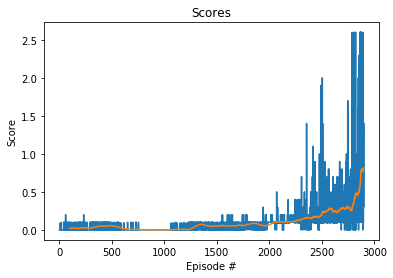

In [10]:
# Show training progress

def plot_scores(scores, rolling_window=100):
    """Plot scores and optional rolling mean using specified window."""
    plt.plot(scores); plt.title("Scores");
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(rolling_mean)
    plt.ylabel('Score')
    plt.xlabel("Episode #")
    plt.show()    

plot_scores(all_scores)

In [11]:
# Release old agent from memory and show that we can
# reload the checkpoint and perform inference

meta_agent = MADDPG(
        state_size,
        action_size,
        num_agents,
        init_noise_scale=init_noise_scale,
        noise_annealing=noise_annealing,
        lr_actor=lr_actor,
        lr_critic=lr_critic,
        device=device,
        replay_buffer_size=replay_buffer_size,
        batch_size=batch_size,
        seed=seed,
        tau=tau,
        gamma=gamma,
        update_every=update_every,
        tensorboard_writer=tensorboard_writer
)

for i, agent in enumerate(meta_agent.agents):
    agent.actor_local.load_state_dict(torch.load("agent_{}_actor.pt".format(i)))
    agent.actor_local.eval()

In [12]:
# Run 10 episodes of inference to watch 
# video of trained agents playing

num_infer_episodes = 10

for i in range(num_infer_episodes):
    env_info = env.reset(train_mode=False)[brain_name]
    meta_agent.reset()
    states = env_info.vector_observations
    scores = np.zeros(num_agents)
    for j in range(max_time_per_episode):
        actions = meta_agent.act(states, noise_scale=noise_scale, use_noise=False)
        flat_actions = actions.reshape(1, -1)
        env_info = env.step(flat_actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        scores += env_info.rewards
        states = next_states
        if np.any(dones):            
            break